<a href="https://colab.research.google.com/github/Blutronics/MultipleRegression/blob/main/Black_Friday_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import pylab

Female = 0 | Male = 1

City Category A = 0 | City Category B = 1 | City Category C = 2

In [2]:
df=pd.read_csv("blackfriday_train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [9]:
df.Age.replace({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6},inplace=True)

In [10]:
df.Product_Category_2.fillna(0,inplace=True)
df.Product_Category_3.fillna(0,inplace=True)


In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,0.0,0.0,7969


In [12]:
df.Stay_In_Current_City_Years.replace({'4+':4},inplace=True)

In [13]:
df.Gender.replace({'F':0,'M':1},inplace=True) 

In [14]:
df.City_Category.replace({'A':0,'B':1,'C':2},inplace=True)

In [15]:
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.astype(str).astype(int)

In [16]:
df["Product_ID"]=df["Product_ID"].str[1:]

In [17]:
df["Product_ID"]=df["Product_ID"].astype(str).astype(int)

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [19]:
df.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.017619,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004716
Product_ID,-0.017619,1.000000,0.021084,0.028892,0.009344,0.010162,-0.003162,0.013194,0.090193,-0.090600,-0.144360,-0.103961
Gender,-0.033474,0.021084,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346
Age,0.032698,0.028892,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,-0.023971,0.009344,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,0.022859,0.010162,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914
Stay_In_Current_City_Years,-0.030737,-0.003162,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,0.020443,0.013194,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,0.003825,0.090193,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,0.003896,-0.090600,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288


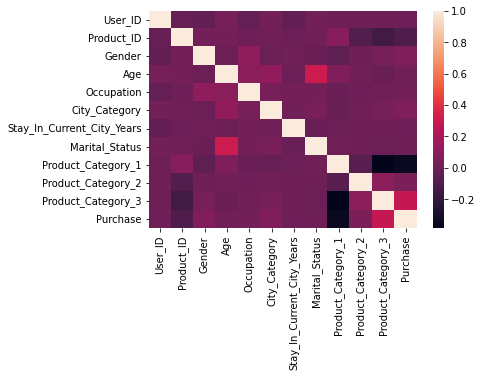

In [20]:
sns.heatmap(df.corr())

{'boxes': [<matplotlib.lines.Line2D at 0x7f7ab2b168d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7ab2aa1ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ab0936ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ab093a7d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7ab2b75450>,
  <matplotlib.lines.Line2D at 0x7f7ab2aa1b90>]}

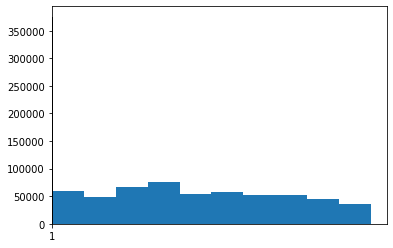

In [21]:
plt.hist(df.Product_ID) #histogram

{'boxes': [<matplotlib.lines.Line2D at 0x7f7ab2589590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7ab258f610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ab24a3650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ab24a3110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7ab2589b50>,
  <matplotlib.lines.Line2D at 0x7f7ab258f0d0>]}

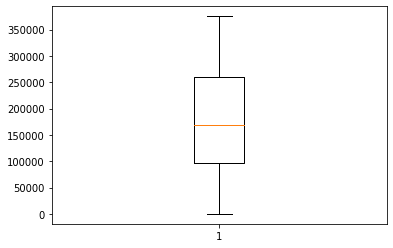

In [23]:
plt.boxplot(df.Product_ID)

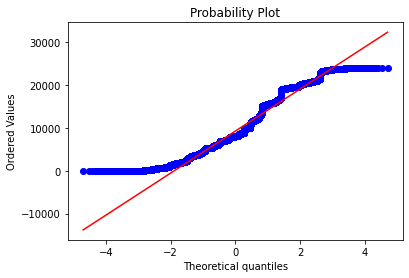

In [26]:
stats.probplot(df.Purchase, dist = "norm", plot = pylab)
plt.show()